In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [23]:
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [24]:
print(df.shape)
print(df)

(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        

In [25]:
y = calihouses.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


In [28]:
from timeit import default_timer as timer
start_ho = timer()
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
end_ho = timer()
time_ho = (end_ho - start_ho)
print(predictions)

[2.34810432 2.91759209 0.06062039 ... 1.6277327  1.5527623  2.14905356]


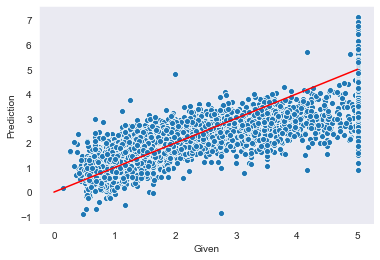

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
plot = sns.scatterplot(y_test, predictions)
plot.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [30]:
start_ho_score = timer()
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, predictions)
print(ho_score)
end_ho_score = timer()
ho_score_time = (end_ho_score - start_ho_score)

-0.514679638920107


In [32]:
from sklearn.model_selection import cross_val_predict
X = np.array(df)
start_kfold = timer()
lm_k = linear_model.LinearRegression()
k_predictions = cross_val_predict(lm_k, X, y, cv=10)
print(k_predictions)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


-0.550952429695665


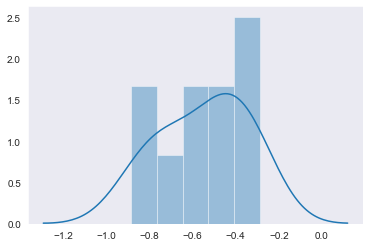

In [33]:
kfold_score_start = timer()
kfold_scores = cross_val_score(lm_k, X, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)
sns.distplot(kfold_scores, bins=5)

In [34]:
start_LOO = timer()
LOO_predictions = cross_val_predict(lm_k, X, y, cv=(len(X)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)

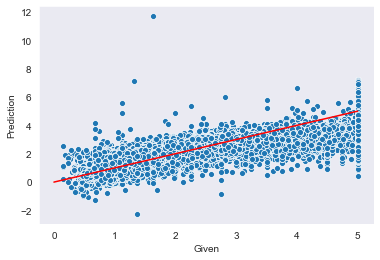

In [35]:
plot_LOO = sns.scatterplot(y, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [ ]:
LOO_score_start = timer()
LOO_score = cross_val_score(lm_k, X, y, cv=(len(X)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

In [ ]:
print("Hold out method took", time_ho, "seconds to generate a model and", ho_score_time ,"seconds to generate a MSE of", ho_score)
print("K-Fold method took", kfold_time, 'seconds to generate a model and', kfold_score_time, 'seconds to generate a MSE of', kfold_scores.mean())
print("Leave One Out Cross Validation method took", LOO_time, 'seconds to generate a model and', LOO_score_time, 'seconds to generate a MSE of', LOO_score)